In [83]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

In [84]:
data = pd.read_csv('../kaggle-competition/Input/data.csv')

# CLEANING

In [85]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [86]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [87]:
data['color'].unique()

array(['G', 'H', 'F', 'D', 'E', 'I', 'J'], dtype=object)

In [88]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [89]:
data.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.798385,61.747932,57.459085,5.732041,5.735939,3.539537,3939.242813
std,0.474353,1.432322,2.231152,1.123169,1.152802,0.709709,4000.344155
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2409.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5331.000000
max,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18823.000000


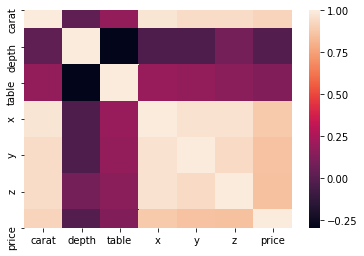

In [90]:
corre = data.corr()
sns.heatmap(corre)

In [91]:
data.clarity.unique()

array(['SI2', 'I1', 'VS2', 'SI1', 'VS1', 'VVS2', 'IF', 'VVS1'],
      dtype=object)

In [92]:
#columns = ['carat','depth', 'table', 'x', 'y', 'z']
#for col in columns:
    #data[col] = (data[col] - np.mean(data[col])) / np.std(data[col]) 
#data.head()

In [93]:
#sns.regplot(data['depth'], data['price'])

In [94]:
#sns.regplot(data['table'], data['price'])

In [95]:
#sns.regplot(data['carat'], data['price'])

In [96]:
#sns.regplot(data['x'], data['price'])

In [97]:
#sns.regplot(data['y'], data['price'])

In [98]:
#sns.regplot(data['z'], data['price'])

In [99]:
#data= data[(data['depth'] >= -5) & (data['depth'] <= 5)]

In [100]:
#data= data[(data['table'] >= -3) & (data['table'] <= 4)]

In [101]:
#data= data[(data['carat'] <= 4)]

In [102]:
#data= data[(data['x'] >= -2) & (data['x'] <= 3.7)]

In [103]:
#data= data[(data['y'] >= -2) & (data['y'] <= 10)]

In [104]:
#data= data[(data['z'] >= -2) & (data['z'] <= 10)]

In [105]:
data.shape

(40455, 10)

In [106]:
col = ['x','y','z']
data.drop(col, axis=1, inplace=True)

In [107]:
dummies = data[['color', 'cut', 'clarity']]
colors = pd.get_dummies(dummies)

In [108]:
colors.head()

,color_D,color_E,color_F,color_G,color_H,color_I,color_J,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [109]:
data = pd.merge(data, colors, on=data.index)
data.head()

,key_0,carat,cut,color,clarity,depth,table,price,color_D,color_E,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,2.26,Ideal,G,SI2,61.9,57.0,12831,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,2.43,Very Good,H,SI2,63.2,57.0,16170,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2,0.80,Premium,F,SI2,61.0,57.0,2797,0,0,...,1,0,0,0,0,1,0,0,0,0
3,3,0.40,Ideal,F,I1,63.3,60.0,630,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4,0.31,Ideal,G,VS2,61.6,55.0,698,0,0,...,0,0,0,0,0,0,0,1,0,0


In [110]:
cols = ['key_0', 'color', 'cut', 'clarity']
data.drop(cols, axis=1, inplace= True)

In [111]:
data.head()

,carat,depth,table,price,color_D,color_E,color_F,color_G,color_H,color_I,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.26,61.9,57.0,12831,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2.43,63.2,57.0,16170,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,0.80,61.0,57.0,2797,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.40,63.3,60.0,630,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.31,61.6,55.0,698,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
data.columns

Index(['carat', 'depth', 'table', 'price', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

# LINEAR REGRESSION

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [113]:
columns = ['carat','depth', 'table','color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
X = data[columns]
y = data['price']

In [34]:
diamond_model = LinearRegression()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
d = diamond_model.fit(X_train, y_train)
y_pred = d.predict(X_test)

In [37]:
scores = pd.DataFrame({
    'pred': y_pred,
    'gt': y_test,
    'dif': y_pred - y_test
})

In [38]:
sum(abs(scores['dif']))/len(scores['dif'])

799.8165631314167

In [39]:
sum(abs(scores['dif']))

6444921.865712956

In [40]:
r2_score(y_test, y_pred)

0.9225078416510104

In [158]:
mean_squared_error(y_test, y_pred)

1153261.9844133817

In [ ]:
#0.9256894383131722

In [35]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [37]:
steps = [
    StandardScaler(),
    Normalizer(),
#    PCA(n_components=3)
]

In [38]:
pipe = make_pipeline(*steps)

X = pipe.fit_transform(X)

# SVR

In [103]:
from sklearn.svm import SVR

In [104]:
clf = SVR(C=1.0)

In [105]:
clf.fit(X_train, y_train)

/home/joaquin/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [106]:
y_predv = clf.predict(X_test)

In [107]:
r2_score(y_test, y_predv)

0.573520258295817

In [398]:
sum(abs(scores['dif']))

10481927.466214497

# RANDOM FOREST

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

In [128]:
clf = RandomForestRegressor(n_estimators=500)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
y_predr = clf.predict(X_test)

In [ ]:
r2_score(y_test, y_predr)

In [120]:
#0.9810085373434367

In [121]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predr)

311957.5920208213

In [127]:
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_predr))
rmse

557.3873406538183

# GRADIENT BOOSTING REGRESSOR

In [159]:
from sklearn.ensemble import GradientBoostingRegressor

In [160]:
reg = GradientBoostingRegressor()

In [161]:
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
y_predg = reg.predict(X_test)

In [163]:
r2_score(y_test, y_predg)

0.9665566235020442

# TEST

In [56]:
test = pd.read_csv('../kaggle-competition/Input/test.csv')

In [57]:
columns = ['carat','depth', 'table', 'x', 'y', 'z']
for col in columns:
    test[col] = (test[col] - np.mean(test[col])) / np.std(test[col]) 
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,-0.500241,Ideal,I,VS2,0.241489,-1.537773,-0.383443,-0.360777,-0.340759
1,1,0.535739,Ideal,G,VS2,0.101972,-0.646693,0.744052,0.711770,0.740676
2,2,-0.627096,Premium,E,VS2,-0.177064,-0.646693,-0.553462,-0.595116,-0.585884
3,3,0.007178,Ideal,F,VS1,0.729801,-0.646693,0.162408,0.207042,0.279264
4,4,-0.542526,Ideal,G,VS1,-0.246823,-0.201152,-0.446082,-0.477947,-0.484950


In [58]:
dummies = test[['color', 'cut', 'clarity']]
colors = pd.get_dummies(dummies)

In [59]:
test = pd.merge(test, colors, on=test.index)
test.head()

,key_0,id,carat,cut,color,clarity,depth,table,x,y,...,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0,-0.500241,Ideal,I,VS2,0.241489,-1.537773,-0.383443,-0.360777,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0.535739,Ideal,G,VS2,0.101972,-0.646693,0.744052,0.711770,...,0,0,0,0,0,0,0,1,0,0
2,2,2,-0.627096,Premium,E,VS2,-0.177064,-0.646693,-0.553462,-0.595116,...,1,0,0,0,0,0,0,1,0,0
3,3,3,0.007178,Ideal,F,VS1,0.729801,-0.646693,0.162408,0.207042,...,0,0,0,0,0,0,1,0,0,0
4,4,4,-0.542526,Ideal,G,VS1,-0.246823,-0.201152,-0.446082,-0.477947,...,0,0,0,0,0,0,1,0,0,0


In [60]:
cols = ['id','key_0', 'color', 'cut', 'clarity']
test1 = test.drop(cols, axis=1)

In [61]:
test.columns

Index(['key_0', 'id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'x', 'y', 'z', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [75]:
colst = ['carat', 'depth', 'table', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
Xt = test1[colst]

In [90]:
y_pred = diamond_model.predict(Xt)

In [79]:
y_random = clf.predict(Xt)

In [164]:
y_gradient = reg.predict(Xt)

In [80]:
predictions = pd.DataFrame({
    'id': test['id'],
    'price': y_random
})

In [81]:
predictions

,id,price
0,0,1306.336000
1,1,6568.993333
2,2,1685.660267
3,3,4019.341267
4,4,1685.352000
...,...,...
13480,13480,2187.974667
13481,13481,1995.047333
13482,13482,11162.694533
13483,13483,513.089733


In [82]:
predictions.to_csv('prueba5.csv', index=False)